In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import cmath
#import scipy.integrate.odeint

In [3]:
#N = int(input("enter the no. of nodes : "))
N =10

In [5]:
G = nx.scale_free_graph(N) #scale free directed network is created
G = G.to_undirected() # changed to undirected graph
G.pos = nx.spring_layout(G) #to give nodes spring like structure
    #nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

#normal distribution
omega = np.random.normal(loc=1, scale=2, size=(N))

it=0    
for node in G.nodes():
    G.nodes[node]['w'] = omega[it]
    G.nodes[node]['theta'] = np.random.rand()
    G.nodes[node]['thetadot'] = 0
    it+=1

nextG = G.copy() #copy graph

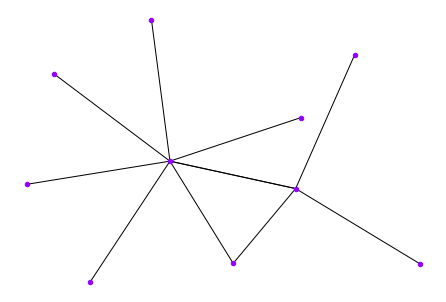

In [6]:
nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

In [7]:
#extracting adjacency matrix
p = nx.adjacency_matrix(G).toarray()  
#print(p)
#changing weighted matrix to unweighted
A = (p>=1).astype(int)
print(A)

[[1 1 1 1 0 0 1 1 1 1]
 [1 0 1 0 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [8]:
def f(t0,theta, node,t):
    cpl = 0
    lmd = 10

    # sigma terms
    for j in range(N):
        cpl += A[node][j]*np.sin(theta[j]-theta[node])
    
    
    thetadot = nextG.nodes[node]['w'] + (lmd*abs(nextG.nodes[node]['w'])*cpl)/(sum(A[node]))
                
    return thetadot

In [9]:
# RK-4 method
def rk4(t0,y0,xn,n):
    
    # Calculating step size
    h = (xn-t0)/n

    time_series = []
    print(n,N)
    for i in tqdm(range(n)):
#        data = np.zeros(N)
        temp = np.array(y0)
        
        time_series.append(y0) 
#        print(time_series)
        for node in G.nodes():
            
            k1 = h * (f(t0, y0, node, h))
            k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
            k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
            k4 = h * (f((t0+h), (y0+k3),node, h))
            k = (k1+2*k2+2*k3+k4)/6
            
            yn = y0[node] + k
            
            temp[node] = yn
            t0 = t0+h
#            data[node] = yn
        y0 = temp
    return time_series

# Inputs
t0 = 0
y0 = np.zeros(N)
for i in range(N):
    y0[i] = G.nodes[i]['theta']
xn = 100
step = 1000

data = np.array(rk4(t0,y0,xn,step))
#data = np.array(data)
print(np.shape(data))

  7%|▋         | 72/1000 [00:00<00:02, 326.94it/s]

1000 10


100%|██████████| 1000/1000 [00:02<00:00, 398.21it/s]

(1000, 10)


In [10]:
print(data)

[[ 0.3897748   0.74807631  0.46145147 ...  0.5665972   0.54876876
   0.69714084]
 [ 0.73602687  0.33128378  0.85058582 ...  0.29014067  0.47550665
   0.29479559]
 [ 0.6240404   1.18642204  0.46194199 ...  0.62206356  0.92466796
   1.34173805]
 ...
 [79.17501242 79.12690301 78.50971477 ... 78.29199984 78.41002272
  78.04742927]
 [78.79335806 78.55917659 79.83115686 ... 78.96600563 79.40552131
  80.04054789]
 [79.53895136 79.5812971  78.30058444 ... 78.69366861 78.80932566
  78.35588584]]


In [11]:

def order(theta):
    z = sum(np.exp(theta*1j))/len(theta)
#    print(np.absolute(z), np.angle(z))
    return np.absolute(z), np.angle(z)

[0.9812793451652762, 0.9242300818950477, 0.7976238677883776, 0.9459069846405264, 0.8226665516853715, 0.7064353862262454, 0.5928049962362943, 0.7740540393761431, 0.8385573649741355, 0.741545170641055, 0.7599584835711547, 0.7279795171944788, 0.6675296060741824, 0.7971207655102991, 0.6611225811560143, 0.7439710955269027, 0.8106457302092532, 0.8466220066978142, 0.7733234968456552, 0.6991912029820813, 0.555093507839237, 0.8141729984495291, 0.7339718898669393, 0.8434064676835145, 0.5963175434981708, 0.7086888535766379, 0.7021113266677753, 0.7314041569989382, 0.7850784223869804, 0.6769340668446472, 0.7527888513807204, 0.7448804478423492, 0.6145830432995579, 0.7152413477076175, 0.8054439595601592, 0.7178758275514542, 0.608887574055141, 0.8097511456283665, 0.5776701931790772, 0.7809079933420631, 0.6373395606961525, 0.8010611483209528, 0.7390487110917052, 0.661399950299543, 0.6845355608985917, 0.8557816441356744, 0.787229192830613, 0.8092354271248298, 0.707112526466639, 0.7876236245657763, 0.548

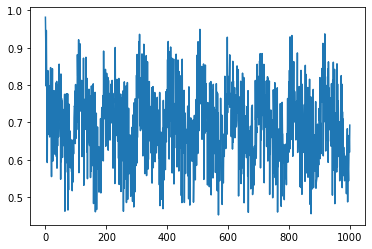

In [12]:
ordr = []
angle = []


for i in range(step):
    the_ta = data[i]
    x,y = order(the_ta)
#    i+=25
    ordr.append(x)
    angle.append(y)

#ordr = np.array(ordr)
#print(np.shape(ordr))
#abs_ord = np.zeros(step)
#print(abs_ord)

#ordr = ordr.flatten()
#for i in range(len(ordr)):
#    abs_ord = ordr[i][0]
#abs_ord = ordr1[0:int(step/2):1]
#angle = ordr1[int(step/2)+1:step:1]
print(ordr)
#print(angle)
plt.plot(ordr)
#plt.plot(angle)